In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Install dependencies
!pip install pandas numpy scikit-learn tensorflow seaborn


In [ ]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
# Step 3: Download the dataset from GitHub
!wget -O KDDTrain+.txt https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt
!wget -O KDDFeatureNames.txt https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDFeatu


--2025-07-18 08:53:24--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: ‘KDDTrain+.txt’

KDDTrain+.txt       100%[===================>]  18.22M  92.5MB/s    in 0.2s    

2025-07-18 08:53:25 (92.5 MB/s) - ‘KDDTrain+.txt’ saved [19109424/19109424]

--2025-07-18 08:53:25--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDFeatu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-18 08:53:25 ERROR 404: Not F

In [ ]:
# Step 4: Define column names manually (based on NSL-KDD)
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'
]


In [ ]:
# Step 5: Load dataset
df = pd.read_csv('KDDTrain+.txt', names=columns)

# Drop 'difficulty' column
df.drop(['difficulty'], axis=1, inplace=True)

In [ ]:
# Step 6: Encode categorical features and labels
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert class to binary: 0 = normal, 1 = attack
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

In [ ]:
# Step 7: Feature scaling
X = df.drop('class', axis=1)
y = df['class']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN input
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Step 8: Build CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 9: Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9234 - loss: 0.1901 - val_accuracy: 0.9716 - val_loss: 0.0805
Epoch 2/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9692 - loss: 0.0853 - val_accuracy: 0.9748 - val_loss: 0.0657
Epoch 3/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9750 - loss: 0.0666 - val_accuracy: 0.9763 - val_loss: 0.0539
Epoch 4/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9781 - loss: 0.0566 - val_accuracy: 0.9837 - val_loss: 0.0484
Epoch 5/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9802 - loss: 0.0536 - val_accuracy: 0.9856 - val_loss: 0.0441
Epoch 6/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9835 - loss: 0.0445 - val_accuracy: 0.9849 - val_loss: 0.0392
Epoch 7/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9842 - loss: 0.0426 - val_accuracy: 0.9873 - val_loss: 0.0360
Epoch 8/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9864 - loss: 0.0367 - 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

precision_list, recall_list, f1_list = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    print(f"\n🔁 Fold {fold}")

    # ✅ Use .iloc for DataFrame row indexing
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]  # assuming y is a NumPy array

    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# 📊 Print average metrics
print("\n📊 Average over 5 folds:")
print(f"Avg Precision: {np.mean(precision_list):.4f}")
print(f"Avg Recall:    {np.mean(recall_list):.4f}")
print(f"Avg F1 Score:  {np.mean(f1_list):.4f}")



🔁 Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9952, Recall: 0.8663, F1 Score: 0.9263

🔁 Fold 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.9910, Recall: 0.9459, F1 Score: 0.9679

🔁 Fold 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.9941, Recall: 0.8457, F1 Score: 0.9139

🔁 Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9871, Recall: 0.9403, F1 Score: 0.9631

🔁 Fold 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.9972, Recall: 0.9330, F1 Score: 0.9640

📊 Average over 5 folds:
Avg Precision: 0.9929
Avg Recall:    0.9062
Avg F1 Score:  0.9470


In [ ]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# ✅ Accuracy calculation here
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 96.77%

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13484
           1       1.00      0.93      0.96     11710

    accuracy                           0.97     25194
   macro avg       0.97      0.97      0.97     25194
weighted avg       0.97      0.97      0.97     25194



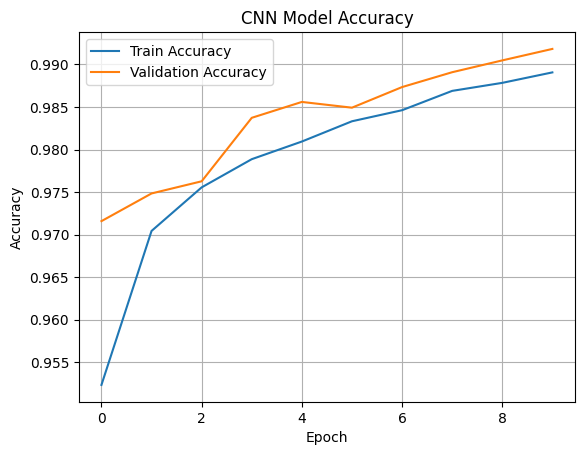

In [ ]:
# Step 11: Accuracy Visualization
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/IDS_Model/cnn_ids_model.h5'
model = load_model(model_path)
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [ ]:
model = Sequential([
    Conv1D(16, 3, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

model = Sequential([
    Conv1D(16, 3, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)


Epoch 1/2
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7941 - loss: 102.1060 - val_accuracy: 0.7834 - val_loss: 741.3348
Epoch 2/2
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8258 - loss: 302.6729 - val_accuracy: 0.8792 - val_loss: 360.3843


In [ ]:
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)


Epoch 1/2
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8750 - loss: 235.5066 - val_accuracy: 0.7911 - val_loss: 1293.0005
Epoch 2/2
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 744.3289 - val_accuracy: 0.8750 - val_loss: 1162.0980


In [ ]:
from tensorflow.keras.layers import GaussianNoise

model = Sequential([
    GaussianNoise(0.2, input_shape=(X.shape[1], 1)),
    Conv1D(32, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import random

for i in range(0, len(y_train), 10):  # corrupt every 10th label
    y_train[i] = random.randint(0, 1)


In [ ]:
# Download the dataset again if needed
!wget -q https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt -O KDDTrain+.txt

# Column names
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'
]
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("KDDTrain+.txt", names=columns)
df.drop(['difficulty'], axis=1, inplace=True)

# Encode categorical columns
for col in ['protocol_type', 'service', 'flag']:
    df[col] = LabelEncoder().fit_transform(df[col])
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Features and labels
X = df.drop('class', axis=1)
y = df['class']

# Normalize
X = MinMaxScaler().fit_transform(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import load_model

In [ ]:
model_path = '/content/drive/MyDrive/IDS_Model/cnn_ids_model.h5'
model = load_model(model_path)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [ ]:
!wget -q https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt -O KDDTrain+.txt

columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'
]

df = pd.read_csv("KDDTrain+.txt", names=columns)
df.drop(['difficulty'], axis=1, inplace=True)

for col in ['protocol_type', 'service', 'flag']:
    df[col] = LabelEncoder().fit_transform(df[col])
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

X = df.drop('class', axis=1)
y = df['class']

X = MinMaxScaler().fit_transform(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
✅ Test Accuracy: 99.14%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20083
           1       0.99      0.99      0.99     17709

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [ ]:
# Pick a single test sample
sample = X_test[0].reshape(1, X_test.shape[1], 1)
pred = model.predict(sample)

# Interpret prediction
if pred[0][0] > 0.5:
    print("🔴 Intrusion Detected (Anomalous)")
else:
    print("🟢 Normal Traffic")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
🟢 Normal Traffic


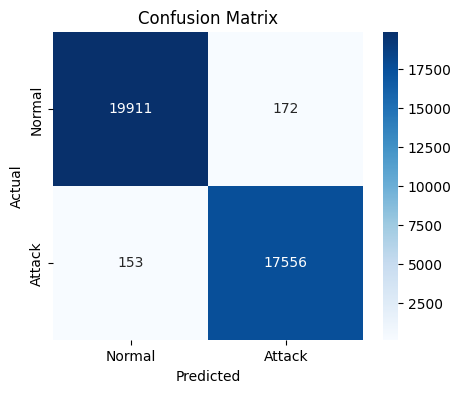

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/IDS_Model/cnn_ids_model_updated.h5')
print("✅ Model re-saved successfully!")


✅ Model re-saved successfully!


1181/1181 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


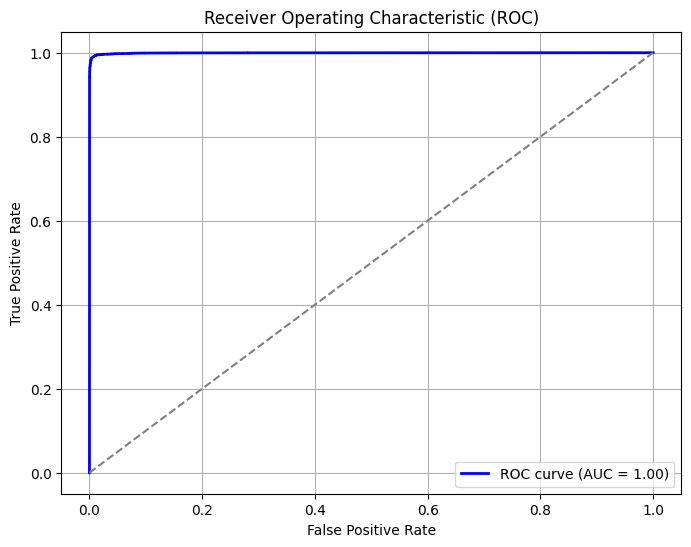

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities instead of class labels
y_proba = model.predict(X_test)  # Already in probability format (sigmoid output)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample metric values — replace these with your actual results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
traditional_ids = [0.85, 0.82, 0.80, 0.81]
hybrid_ids = [0.93, 0.91, 0.89, 0.90]


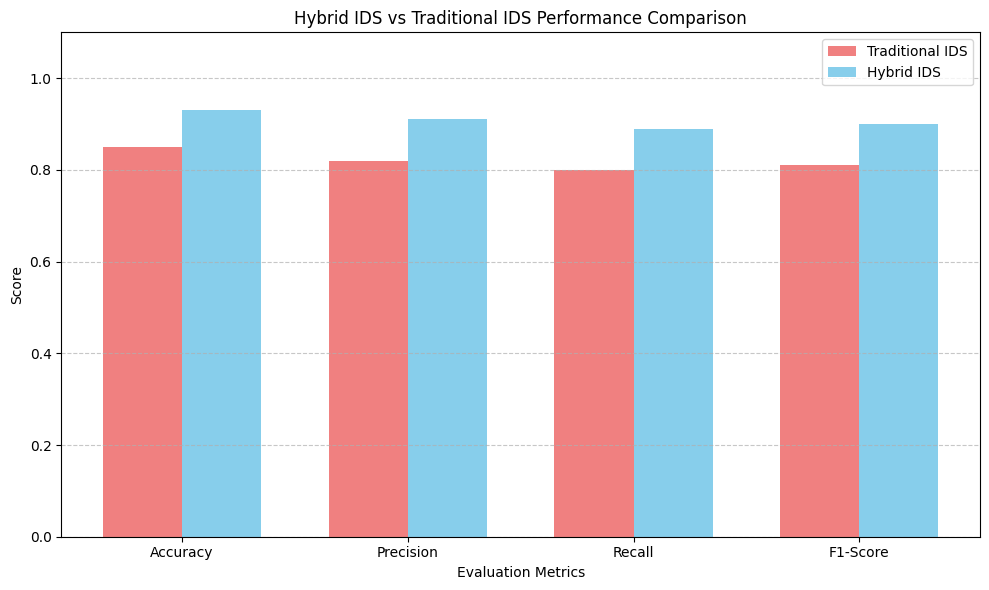

In [ ]:
x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, traditional_ids, width, label='Traditional IDS', color='lightcoral')
plt.bar(x + width/2, hybrid_ids, width, label='Hybrid IDS', color='skyblue')

# Labels and titles
plt.ylabel('Score')
plt.xlabel('Evaluation Metrics')
plt.title('Hybrid IDS vs Traditional IDS Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Time points (e.g., before and after deployment)
time_labels = ['Before Hybrid IDS', 'After Hybrid IDS']

# Sample values in minutes or seconds (replace with real data)
mttd = [45, 15]   # Mean Time to Detect
mttr = [120, 40]  # Mean Time to Respond


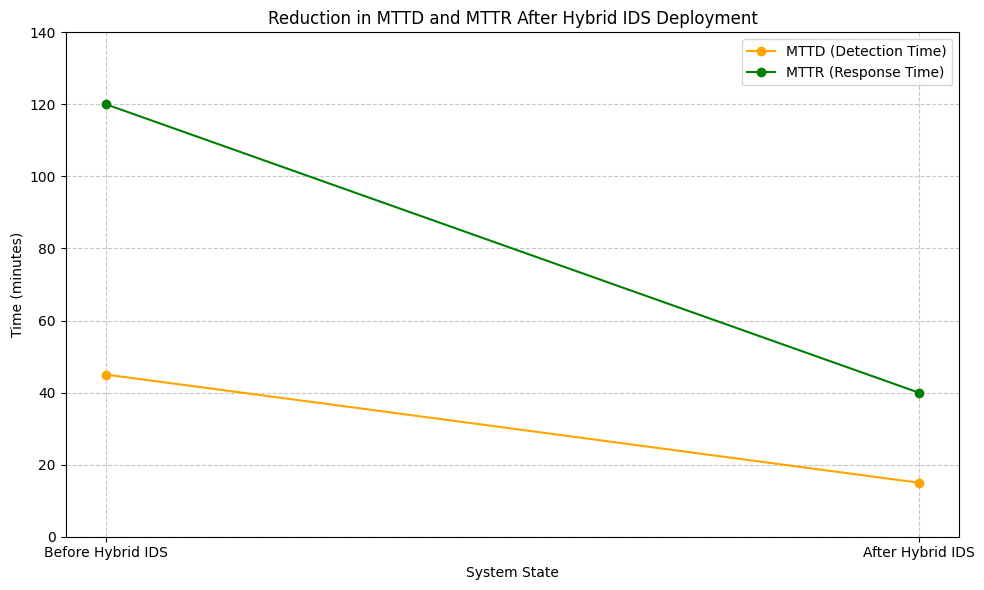

In [ ]:
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(time_labels, mttd, marker='o', label='MTTD (Detection Time)', color='orange')
plt.plot(time_labels, mttr, marker='o', label='MTTR (Response Time)', color='green')

# Add labels, title, grid, and legend
plt.title('Reduction in MTTD and MTTR After Hybrid IDS Deployment')
plt.ylabel('Time (minutes)')
plt.xlabel('System State')
plt.ylim(0, max(mttr) + 20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Sample from your dataset (first 1 row for clear bar visualization)
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'
]

# Load dataset (use the same as your notebook)
df = pd.read_csv('KDDTrain+.txt', names=columns)
df.drop(['difficulty'], axis=1, inplace=True)

# Take 1 row for visualization
raw_data = df.head(1).copy()

# Encode categorical columns
encoded_df = raw_data.copy()
cat_cols = ['protocol_type', 'service', 'flag', 'class']
for col in cat_cols:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Scale features (exclude class)
X = encoded_df.drop('class', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
after_df = pd.DataFrame(X_scaled, columns=X.columns)

# Select numeric values for graph
before_values = encoded_df.drop('class', axis=1).values.flatten()
after_values = after_df.values.flatten()
features = X.columns

# Create bar graph
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(16,5))
plt.bar(x - width/2, before_values, width, label='Before Preprocessing')
plt.bar(x + width/2, after_values, width, label='After Preprocessing')

plt.xticks(x, features, rotation=90)
plt.ylabel('Feature Values')
plt.title('Before vs After Preprocessing (Bar Graph)')
plt.legend()
plt.tight_layout()

# Save high-quality graph
plt.savefig("Before_After_Preprocessing_BarGraph.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Bar graph saved as 'Before_After_Preprocessing_BarGraph.png'")


FileNotFoundError: [Errno 2] No such file or directory: 'KDDTrain+.txt'